> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this Project We will analyse TMDb Movie Dataset to answer a few questions
- what is the most popular genre
- Relations Between Budget and Revenue
- Relations Between Rate and Revenue
- Relations Between Popularity and Revenue
- What is The most Profit Movie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
### `To Inspect The Data And Check For Missing or duplicated Values and Data types`

### General Properties

In [3]:
# Read CSV File and Print a few lines to check the data

df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [4]:
# Get the number of Rows & Columns
df.shape

(10866, 21)

> - We Have "10866" Row & "21" Column<br>


In [5]:
# Get Data types and null missing values
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> - We Have Many Missing Values that we will have to handle

In [6]:
# Check for any duplicates
df.duplicated().sum()

1

> - One Dublicated Row

In [7]:
# Get More Statistics 
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09



### Data Cleaning
#### Cleaning The Data to help with accurate answers

#### 1. Remove Duplicate Values

In [8]:
df.drop_duplicates(inplace = True)

# Check if The Dublicated Row Removed
df.shape

(10865, 21)

#### 2. removed any unnecessary columns

In [9]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj', 'release_date'], axis=1, inplace=True)

# Check The Remaining Columns
df.head()

popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   
1  Action|Adventure|Science Fiction|Thriller        6185           7.1   
2         Adventure|Science Fiction|Thriller        2480           6.3   
3   Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                      Action|Crime|Thriller        2947           7.3   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

#### 3. removed any Row With null Values

In [10]:
# Check For Null Values to Remove
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

> __We Have 23 Null Value in genres, So We will remove it__

In [11]:
# Drop Rows with Null Values 
df.dropna(inplace=True)

# Check Again for Null Values
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

#### 4. Remove Zeros from (Budget, Revenue) to not effect negative on the analysis

In [12]:
# Remove Budgets With Zero Values
df.drop(df[df.budget == 0].index, inplace=True)

In [13]:
# Remove Revenue With Zero Values
df.drop(df[df.revenue == 0].index, inplace=True)

In [14]:
# Check The Final Row and Column Count
print(df.shape)

df.head()

(3854, 9)


popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   
1  Action|Adventure|Science Fiction|Thriller        6185           7.1   
2         Adventure|Science Fiction|Thriller        2480           6.3   
3   Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                      Action|Crime|Thriller        2947           7.3   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

<a id='eda'></a>
## Exploratory Data Analysis
- ### In This Step We will explore the data further and find relations and answer the questions with the help of Visualization



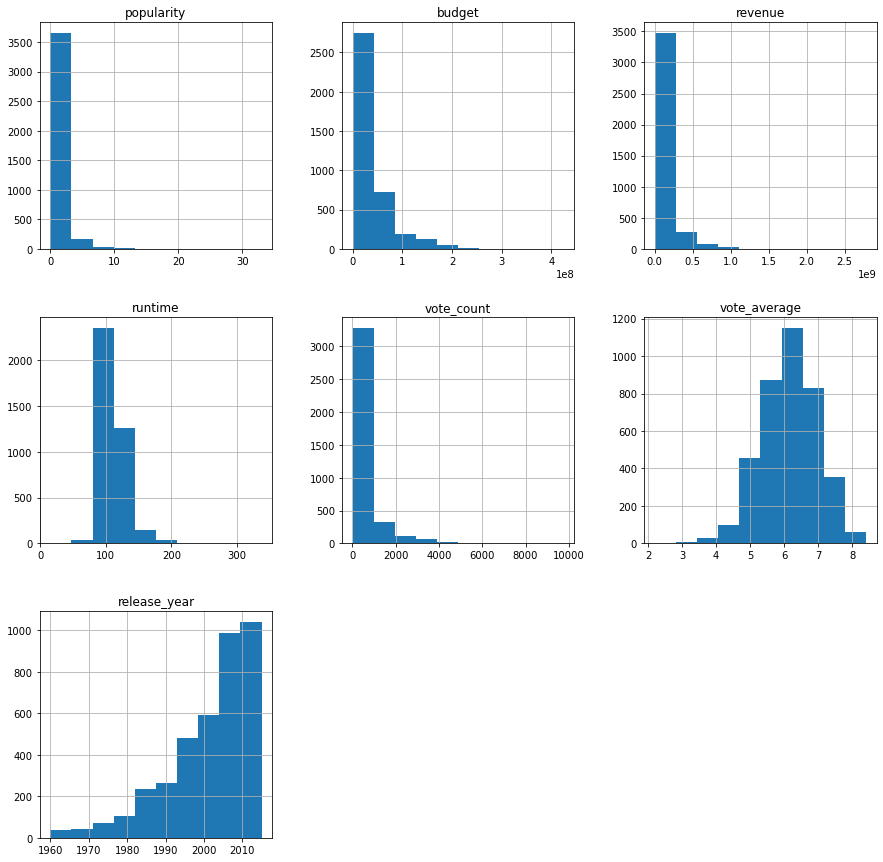

In [15]:
df.hist(figsize=(15,15));

### Research Question 1: What is the most popular genre
#### - First we have To Get All the Genres in one variable
#### - Then split all the genres into single list
#### - Finally Count the Occurance of each genre to get the most popular

In [16]:
# Add All Genres To one Variable with '|' Seperator
data = df['genres'].str.cat(sep='|')

#Seperate the Genres
data = pd.Series(data.split('|'))

#Count the Occurance of Each Genre
count = data.value_counts()
count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

> __Visualize The Final Count Result__

Text(0, 0.5, 'Occurance')

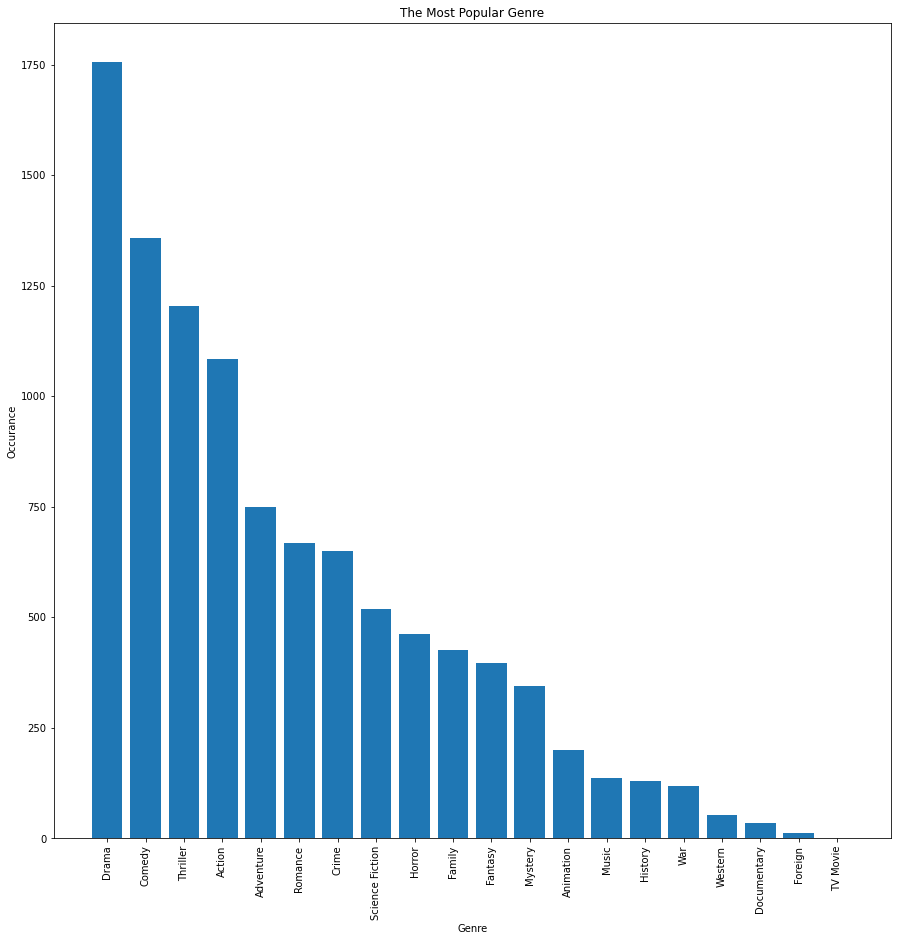

In [17]:
plt.subplots(figsize=(15,15))
plt.bar(count.index, count)
plt.xticks(rotation='90')
plt.title('The Most Popular Genre')
plt.xlabel('Genre')
plt.ylabel('Occurance')

> - __Drama__ Is the most Popular Genre

### Research Question 2:  Relations Between Budget and Revenue

#### __First show the relation in scatter__

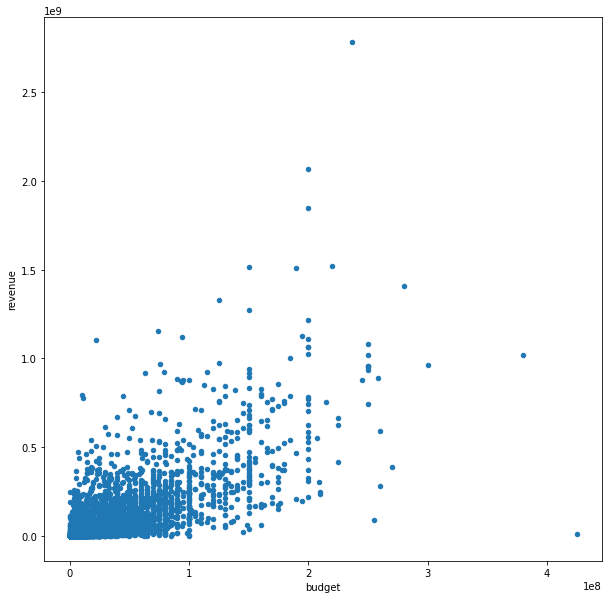

In [18]:
df.plot(x='budget', y='revenue', kind='scatter', figsize=(10,10));

### It Has a Positive Corrolation

### Now Getting The The High and Low Revenue

In [19]:
# Getting The median to devide dataframe into high and low Revenue
median_rev = df.revenue.median()
high_rev = df.query('revenue >= {}'.format(median_rev))
low_rev = df.query('revenue < {}'.format(median_rev))

In [20]:
# Calculate the Mean Budget for the High Revenue and Low Revenue
mean_budget_high = high_rev['budget'].mean()
mean_budget_low = low_rev['budget'].mean()
mean_budget_high

57175044.18266736

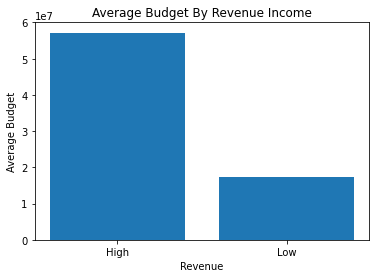

In [21]:
# Create a bar chart with proper labels
heights = [mean_budget_high, mean_budget_low]
labels = ['High', 'Low']
plt.bar(labels, heights)
plt.title('Average Budget By Revenue Income')
plt.xlabel('Revenue')
plt.ylabel('Average Budget');

> __High Budget__ Movies has __High Revenue__

### Research Question 3:  Relations Between Rate and Revenue

#### First show the relation in scatter

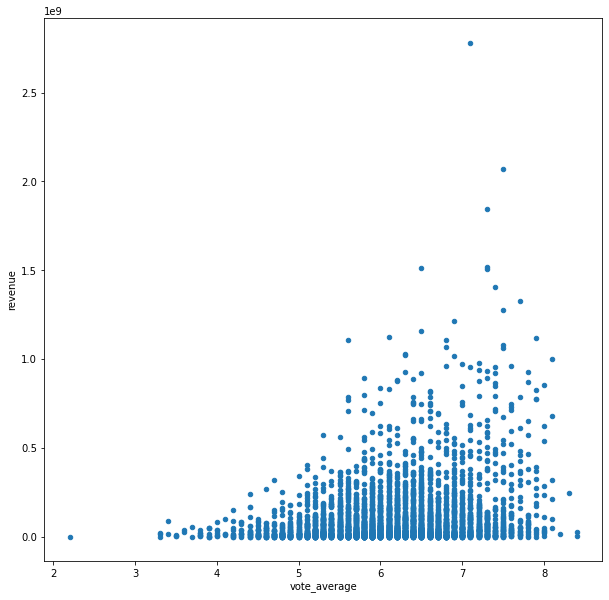

In [22]:
df.plot(x='vote_average', y='revenue', kind='scatter', figsize=(10,10));

### Seem It Has a Positive Corrolation

In [23]:
# Calculate the Mean vote for the High Revenue and Low Revenue
mean_vote_high = high_rev['vote_average'].mean()
mean_vote_low = low_rev['vote_average'].mean()
print(mean_vote_high)

6.298339387649186


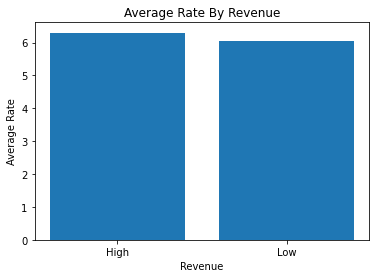

In [24]:
# Create a bar chart with proper labels
heights = [mean_vote_high, mean_vote_low]
labels = ['High', 'Low']
plt.bar(labels, heights)
plt.title('Average Rate By Revenue')
plt.xlabel('Revenue')
plt.ylabel('Average Rate');

> Movies with __High Revenue__ has slightly __Higher Rate__

### Research Question 4:  Relations Between Popularity and Revenue


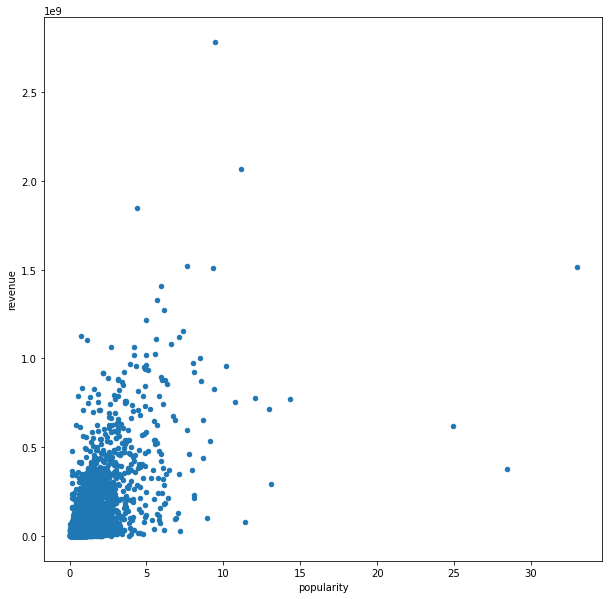

In [25]:
df.plot(x='popularity', y='revenue', kind='scatter', figsize=(10,10));

In [26]:
# Calculate the Mean Popularity for the High Revenue and Low Revenue
mean_popularity_high = high_rev['popularity'].mean()
mean_popularity_low = low_rev['popularity'].mean()
print(mean_popularity_low)

0.6561483393876515


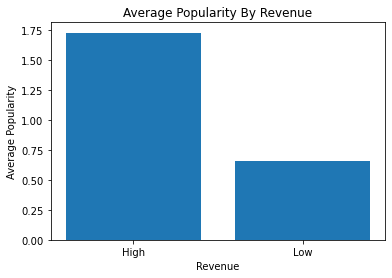

In [27]:
# Create a bar chart with proper labels
heights = [mean_popularity_high, mean_popularity_low]
labels = ['High', 'Low']
plt.bar(labels, heights)
plt.title('Average Popularity By Revenue')
plt.xlabel('Revenue')
plt.ylabel('Average Popularity');

> __Popular__ Movies has __Higher Revenue__

### Research Question 5:  What is The most Profit Movie

#### To get the most profit movie we have to calculate the profits for all movies
#### profit = revenue - budget

In [28]:
# Calulate The profit for all movies and add column for profit
df['profit'] = df['revenue'] - df['budget']

In [29]:
# Get the movie with the high profit
most_profit_movie = df.query('profit == {}'.format(df['profit'].max()))
most_profit_movie

popularity     budget     revenue original_title  runtime  \
1386    9.432768  237000000  2781505847         Avatar      162   

                                        genres  vote_count  vote_average  \
1386  Action|Adventure|Fantasy|Science Fiction        8458           7.1   

      release_year      profit  
1386          2009  2544505847

<a id='conclusions'></a>
## Conclusions

#### The Conclustion With the Questions we Asked Is: 
> - The Most Popular Genre is __Drama__ followed by __Comedy__.
> - The Average Budget to get a __High Revenue__ is Around __57175044__.
> - The __High Rate__ Movies has slightly __High Revenue__ then __low Rate__ Movies.
> - The more __Popular__ the Movie is, The more __Revenue__ it has.
> - The Most Profit Movie is __Avatar (2011)__ With a Profit __2,544,505,847__